<a href="https://colab.research.google.com/github/Aniketh-GHub/Unsupervised-Learning-Projects/blob/main/Diabetes_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/diabetes.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.drop(['BMI', 'DiabetesPedigreeFunction'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
Age,0
Outcome,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
 3   SkinThickness  768 non-null    int64
 4   Insulin        768 non-null    int64
 5   Age            768 non-null    int64
 6   Outcome        768 non-null    int64
dtypes: int64(7)
memory usage: 42.1 KB


In [10]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [11]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [12]:
len(df['SkinThickness'].unique())

51

In [13]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [14]:
X=df
y=df['Glucose']

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Glucose'] = le.fit_transform(X['Glucose'])
y = le.transform(y)

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# If 'Glucose' is already an integer, no need to convert it to datetime
# If you want to apply Label Encoding to the 'Glucose' column, you can do it as follows:
le = LabelEncoder()
X['Glucose'] = le.fit_transform(X['Glucose'])  # If needed for encoding

# Apply MinMaxScaler to scale the entire DataFrame
ms = MinMaxScaler()
X = ms.fit_transform(X)  # This applies scaling to all columns in X


In [21]:
# Convert numpy array back to pandas DataFrame
X = pd.DataFrame(X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome'])

# Print the first few rows of the DataFrame
print(X.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       Age  \
0     0.352941  0.637037       0.590164       0.353535  0.000000  0.483333   
1     0.058824  0.170370       0.540984       0.292929  0.000000  0.166667   
2     0.470588  0.896296       0.524590       0.000000  0.000000  0.183333   
3     0.058824  0.200000       0.540984       0.232323  0.111111  0.000000   
4     0.000000  0.555556       0.327869       0.353535  0.198582  0.200000   

   Outcome  
0      1.0  
1      0.0  
2      1.0  
3      0.0  
4      1.0  


In [22]:
cols=X.columns

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [24]:
X = pd.DataFrame(X, columns=[cols])

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,0.352941,0.637037,0.590164,0.353535,0.000000,0.483333,1.0
1,0.058824,0.170370,0.540984,0.292929,0.000000,0.166667,0.0
2,0.470588,0.896296,0.524590,0.000000,0.000000,0.183333,1.0
3,0.058824,0.200000,0.540984,0.232323,0.111111,0.000000,0.0
4,0.000000,0.555556,0.327869,0.353535,0.198582,0.200000,1.0


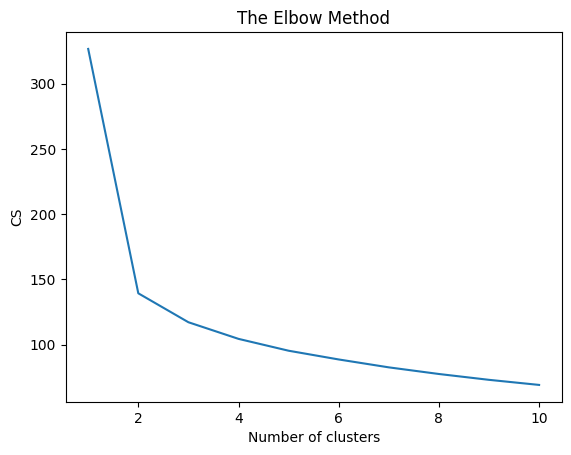

In [26]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [28]:
kmeans.cluster_centers_

array([[ 1.94000000e-01,  3.58992593e-01,  5.58885246e-01,
         1.98626263e-01,  8.13144208e-02,  1.69833333e-01,
        -1.16573418e-15],
       [ 2.86215979e-01,  5.89496960e-01,  5.80529728e-01,
         2.23880597e-01,  1.18600261e-01,  2.67786070e-01,
         1.00000000e+00]])

In [29]:
kmeans.inertia_

139.3650206767496

In [30]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 3 out of 768 samples were correctly labeled.


In [31]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.00


In [32]:
# k= 3

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3 out of 768 samples were correctly labeled.
Accuracy score: 0.00


In [33]:
# k= 5

kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 5 out of 768 samples were correctly labeled.
Accuracy score: 0.01


In [36]:

print(X.columns)

MultiIndex([(  'Pregnancies',),
            (      'Glucose',),
            ('BloodPressure',),
            ('SkinThickness',),
            (      'Insulin',),
            (          'Age',),
            (      'Outcome',)],
           )


In [37]:
x = df.iloc[:, [0, 2]].values

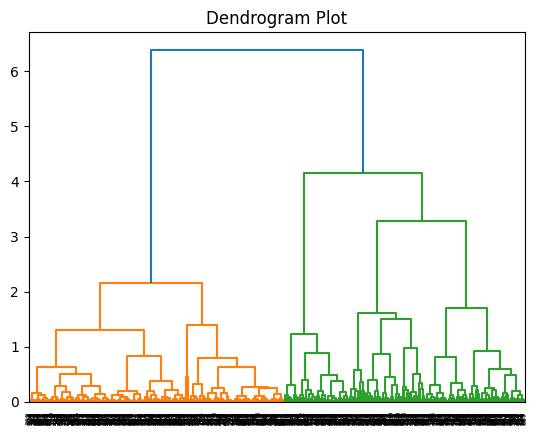

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Attempt to read the CSV file using 'ISO-8859-1' encoding
chunk_size = 100000  # Define the chunk size
scaler = MinMaxScaler()

# Initialize an empty list to hold the processed chunks
scaled_chunks = []

for chunk in pd.read_csv("/content/diabetes.csv", chunksize=chunk_size, encoding='ISO-8859-1'):
    chunk = chunk[['Glucose', 'Age']]  # Select only relevant columns
    chunk = chunk.astype('float32')  # Convert to a smaller data type to reduce memory usage
    chunk_scaled = scaler.fit_transform(chunk)  # Scale the chunk
    scaled_chunks.append(chunk_scaled)

# Concatenate the scaled chunks
X_scaled = np.concatenate(scaled_chunks, axis=0)

# Perform hierarchical clustering (dendrogram)
dendro = shc.dendrogram(shc.linkage(X_scaled, method="ward"))
plt.title("Dendrogram Plot")
plt.show()


In [39]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred= hc.fit_predict(x)

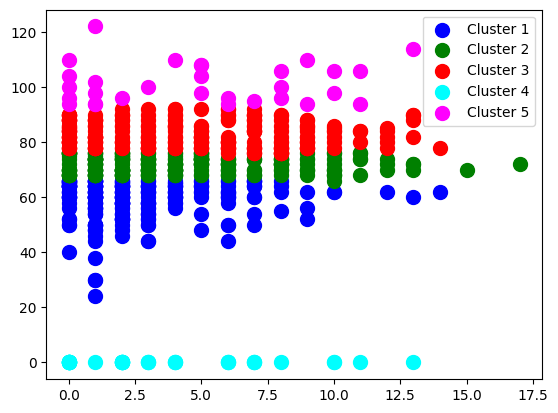

In [41]:
import matplotlib.pyplot as plt

# Visualizing the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s=100, c='magenta', label='Cluster 5')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [42]:
df = pd.read_csv("/content/diabetes.csv", encoding='ISO-8859-1')

In [43]:
X = df.iloc[:, [3, 4]].values

In [44]:
import numpy as np #linear algebra
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals


from sklearn.cluster import DBSCAN #DBSCAN

from sklearn.preprocessing import StandardScaler #scaler

In [45]:
db = DBSCAN(eps=3,min_samples=4)

In [46]:
model = db.fit(X)
labels=model.labels_

In [47]:
labels

array([ 0,  0,  1,  2, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
        1, -1, -1, -1,  1,  1,  0, -1,  3,  1, -1, -1,  1,  0, -1, -1,  1,
        0,  4,  1,  0,  0, -1,  7,  1,  0, -1,  1,  0,  1,  0,  0,  1, -1,
       -1, -1, -1, -1,  0, -1, -1,  1, 14,  1,  1,  1,  5,  1,  0,  0,  1,
       -1,  6, -1, -1,  1, -1,  0,  0,  1,  0,  1,  0,  0,  1,  7,  0,  1,
        5, -1,  7, -1,  0,  1, -1, -1,  1,  8, -1,  0,  9, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1, -1, -1, 11, -1, -1,  1, -1,  1,  1,  1,  0,
       10, -1,  0,  6,  1,  1, -1, 11, -1, -1,  1, -1,  1, -1,  0, 10, -1,
       15,  2,  1, -1,  1,  0, -1,  1, -1,  0,  0, -1,  1,  0, -1,  1, -1,
       -1,  1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  1, -1,  0,  1,  1, -1,
        1, 12,  0, -1, -1, -1,  1, -1,  1,  1,  1,  2, -1,  1,  1,  0, -1,
       -1, -1, -1,  1, -1,  1,  1,  0, -1,  1, 10, -1, -1,  0,  1,  0, -1,
        4,  0, -1,  1, -1,  0,  0, -1,  0, 12, -1, -1, -1, 13,  0,  1, -1,
        1,  1,  4, -1, -1

In [48]:
from sklearn import metrics

In [49]:
sample_scores=np.zeros_like(labels,dtype=bool)

In [50]:
sample_scores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
print(metrics.silhouette_score(X,labels))

0.19439842415285313
